<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Расчет-эффективности-обогащения" data-toc-modified-id="Расчет-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Расчет эффективности обогащения</a></span></li><li><span><a href="#Анализ-недоступных-признаков-в-тестовой-выборке" data-toc-modified-id="Анализ-недоступных-признаков-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ недоступных признаков в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Восстановление-пропущенных-признаков-в-тестовом-датасете" data-toc-modified-id="Восстановление-пропущенных-признаков-в-тестовом-датасете-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Восстановление пропущенных признаков в тестовом датасете</a></span></li><li><span><a href="#Удаление-признаков-в-обучающей-выборке" data-toc-modified-id="Удаление-признаков-в-обучающей-выборке-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Удаление признаков в обучающей выборке</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Проверка-дубликатов" data-toc-modified-id="Проверка-дубликатов-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Проверка дубликатов</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-на-различных-этапах" data-toc-modified-id="Концентрация-металлов-на-различных-этапах-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов на различных этапах</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Суммарная-концентрация-всех-веществ-на-разных-стадиях-обработки" data-toc-modified-id="Суммарная-концентрация-всех-веществ-на-разных-стадиях-обработки-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация всех веществ на разных стадиях обработки</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-вычисления-sMAPE" data-toc-modified-id="Функция-вычисления-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция вычисления sMAPE</a></span></li><li><span><a href="#Подбор-модели" data-toc-modified-id="Подбор-модели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подбор модели</a></span></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Восстановление золота из руды

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

In [2]:
pd.set_option('display.max_rows', 100)

### Изучение данных

In [3]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [4]:
data_train.info()
data_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
data_test.info()
data_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
data_full.info()
data_full.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


**Вывод**

Представленно три датасета:  
* gold_recovery_train_new.csv — обучающая выборка;
* gold_recovery_test_new.csv — тестовая выборка;
* gold_recovery_full_new.csv — исходные данные: содержит обучающую и тестовую выборки со всеми признаками.

### Расчет эффективности обогащения

In [7]:
def recover(data):
    recovery = ((data['rougher.output.concentrate_au'] * (data['rougher.input.feed_au'] - data['rougher.output.tail_au'])
                ) / (data['rougher.input.feed_au'] * (data['rougher.output.concentrate_au'] - data['rougher.output.tail_au']))
               ) * 100
    return recovery

In [8]:
print('MAE:', mean_absolute_error(data_train['rougher.output.recovery'], recover(data_train)))

MAE: 9.682896147825551e-15


**Вывод**

Значение в рамках погрешности машинного эпсилона,  эффективность обогащения с выгруженных данных и по формуле одинаковая.

### Анализ недоступных признаков в тестовой выборке

In [9]:
full_columns = pd.Series(data_full.columns)
test_columns = pd.Series(data_test.columns)
missing_columns = full_columns[~full_columns.isin(test_columns)]

display(missing_columns)
print('Всего пропущенных признаков:', missing_columns.shape[0])

1                           final.output.concentrate_ag
2                           final.output.concentrate_pb
3                          final.output.concentrate_sol
4                           final.output.concentrate_au
5                                 final.output.recovery
6                                  final.output.tail_ag
7                                  final.output.tail_pb
8                                 final.output.tail_sol
9                                  final.output.tail_au
14                primary_cleaner.output.concentrate_ag
15                primary_cleaner.output.concentrate_pb
16               primary_cleaner.output.concentrate_sol
17                primary_cleaner.output.concentrate_au
18                       primary_cleaner.output.tail_ag
19                       primary_cleaner.output.tail_pb
20                      primary_cleaner.output.tail_sol
21                       primary_cleaner.output.tail_au
30        rougher.calculation.sulfate_to_au_conc

Всего пропущенных признаков: 34


In [10]:
missing_target = missing_columns[missing_columns.str.contains('recovery')]
print('Target columns:')
print(missing_target)

Target columns:
5       final.output.recovery
48    rougher.output.recovery
dtype: object


**Вывод**

* ag - серебро
* pb - свинец
* sol - коллоид
* au - золото

final.output.recovery, rougher.output.recovery - целевые признаки: коэффициенты восстановления золота из золотосодержащей руды.

Столбцы calculation относятся к расчетным характеристикам.

Остальные признаки относятся к содержанию в сырье или продукте концентрации веществ на разных этапах обработки.

В тестовой выборке восстановим столбцы таргета. В обучающей выборке удалим остальные столбцы, которые пропущены в тестовой выборке.

### Предобработка данных

#### Восстановление пропущенных признаков в тестовом датасете

In [11]:
data_date_columns = data_full['date']
data_target_columns = data_full[missing_target].join(data_date_columns)
data_target_columns.head()

,final.output.recovery,rougher.output.recovery,date
0,70.541216,87.107763,2016-01-15 00:00:00
1,69.266198,86.843261,2016-01-15 01:00:00
2,68.116445,86.842308,2016-01-15 02:00:00
3,68.347543,87.226430,2016-01-15 03:00:00
4,66.927016,86.688794,2016-01-15 04:00:00


In [12]:
data_test = data_test.merge(data_target_columns, how='inner', on='date')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 55 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

In [13]:
data_test.sample(n=3, random_state=1)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
4532,2017-11-27 14:59:59,232.833580,11.530645,7.96,2.043344,1599.993240,-495.168572,1598.914766,-516.659412,1602.360556,...,15.044079,-500.324423,10.980963,-498.285638,9.036746,-490.501273,16.019041,-501.378779,74.308081,92.257348
3287,2017-10-03 09:59:59,170.803220,6.545194,6.63,1.808195,1537.487075,-500.132966,1598.245349,-506.293021,1600.990337,...,15.001804,-399.010669,13.024062,-496.985681,11.009755,-499.744875,15.016059,-499.743219,71.632689,85.773499
1498,2016-11-13 12:59:59,181.772668,8.004129,7.47,1.133334,1596.809062,-500.185627,1598.814616,-499.794152,1598.688140,...,13.911995,-498.670601,14.889177,-500.258990,14.019309,-500.032358,21.986359,-499.975341,72.972584,89.149195


**Вывод**

В тестовый датасет возвращены таргет признаки.

#### Удаление признаков в обучающей выборке

In [14]:
no_target = missing_columns[~missing_columns.str.contains('recovery')]
print(no_target)

1                           final.output.concentrate_ag
2                           final.output.concentrate_pb
3                          final.output.concentrate_sol
4                           final.output.concentrate_au
6                                  final.output.tail_ag
7                                  final.output.tail_pb
8                                 final.output.tail_sol
9                                  final.output.tail_au
14                primary_cleaner.output.concentrate_ag
15                primary_cleaner.output.concentrate_pb
16               primary_cleaner.output.concentrate_sol
17                primary_cleaner.output.concentrate_au
18                       primary_cleaner.output.tail_ag
19                       primary_cleaner.output.tail_pb
20                      primary_cleaner.output.tail_sol
21                       primary_cleaner.output.tail_au
30        rougher.calculation.sulfate_to_au_concentrate
31    rougher.calculation.floatbank10_sulfate_to

In [15]:
data_train = data_train.drop(data_train[no_target].columns, axis=1)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 55 columns):
date                                          14149 non-null object
final.output.recovery                         14149 non-null float64
primary_cleaner.input.sulfate                 14129 non-null float64
primary_cleaner.input.depressant              14117 non-null float64
primary_cleaner.input.feed_size               14149 non-null float64
primary_cleaner.input.xanthate                14049 non-null float64
primary_cleaner.state.floatbank8_a_air        14145 non-null float64
primary_cleaner.state.floatbank8_a_level      14148 non-null float64
primary_cleaner.state.floatbank8_b_air        14145 non-null float64
primary_cleaner.state.floatbank8_b_level      14148 non-null float64
primary_cleaner.state.floatbank8_c_air        14147 non-null float64
primary_cleaner.state.floatbank8_c_level      14148 non-null float64
primary_cleaner.state.floatbank8_d_air        14146 non-null flo

In [16]:
data_train.sample(n=3, random_state=1)

,date,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
724,2016-02-17 03:00:00,62.891015,113.936941,13.005563,6.766667,1.446045,1601.510438,-499.964885,1598.265482,-498.880695,...,18.000318,-499.536191,15.943132,-509.454741,16.033418,-499.455877,11.984102,-500.328192,26.963094,-501.002955
3283,2016-06-26 09:59:59,66.179884,93.074707,5.024421,8.220000,1.387432,1599.813151,-500.713371,1601.354731,-499.000709,...,15.967248,-500.043142,7.890982,-499.735917,15.960116,-499.979137,6.934666,-499.843085,24.994880,-500.148907
4013,2016-08-01 22:59:59,50.521837,127.497189,10.670305,7.010001,0.790577,1601.129888,-499.315328,1604.590605,-499.248143,...,20.009377,-398.989701,9.974793,-399.296306,9.970410,-400.576919,4.911704,-399.519026,23.003859,-500.384530


**Вывод**

В обучающем датасете удалены недоступные в тестовой выборке признаки.

#### Обработка пропусков

In [17]:
data_train.isna().sum()

date                                            0
final.output.recovery                           0
primary_cleaner.input.sulfate                  20
primary_cleaner.input.depressant               32
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                100
primary_cleaner.state.floatbank8_a_air          4
primary_cleaner.state.floatbank8_a_level        1
primary_cleaner.state.floatbank8_b_air          4
primary_cleaner.state.floatbank8_b_level        1
primary_cleaner.state.floatbank8_c_air          2
primary_cleaner.state.floatbank8_c_level        1
primary_cleaner.state.floatbank8_d_air          3
primary_cleaner.state.floatbank8_d_level        1
rougher.input.feed_ag                           0
rougher.input.feed_pb                         100
rougher.input.feed_rate                         8
rougher.input.feed_size                       144
rougher.input.feed_sol                         78
rougher.input.feed_au                           0


In [18]:
data_train.fillna(method='ffill', inplace=True)
data_train.isna().sum()

date                                          0
final.output.recovery                         0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate       

In [19]:
data_test.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [20]:
data_test.fillna(method='ffill', inplace=True)
data_test.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [21]:
data_full.isna().sum()

date                                                     0
final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     1
final.output.tail_pb                                   101
final.output.tail_sol                                    6
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           24
primary_cleaner.input.depressant                        37
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         104
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                  116
primary_cleaner.output.concentrate_sol                 3

In [22]:
data_full.fillna(method='ffill', inplace=True)
data_full.isna().sum()

date                                                  0
final.output.concentrate_ag                           0
final.output.concentrate_pb                           0
final.output.concentrate_sol                          0
final.output.concentrate_au                           0
final.output.recovery                                 0
final.output.tail_ag                                  0
final.output.tail_pb                                  0
final.output.tail_sol                                 0
final.output.tail_au                                  0
primary_cleaner.input.sulfate                         0
primary_cleaner.input.depressant                      0
primary_cleaner.input.feed_size                       0
primary_cleaner.input.xanthate                        0
primary_cleaner.output.concentrate_ag                 0
primary_cleaner.output.concentrate_pb                 0
primary_cleaner.output.concentrate_sol                0
primary_cleaner.output.concentrate_au           

**Вывод**

Данные индексируются датой и временем получения информации. Соседние по времени параметры часто похожи. Это значит, что мы можем заполнить пропуски соседними значениями.

#### Проверка дубликатов

In [23]:
print('Количество пропусков в обучающем датасете:', data_train.duplicated().sum())
print('Количество пропусков в тестовом датасете:', data_test.duplicated().sum())
print('Количество пропусков в полном датасете:', data_full.duplicated().sum())

Количество пропусков в обучающем датасете: 0
Количество пропусков в тестовом датасете: 0
Количество пропусков в полном датасете: 0


**Вывод**

Дубликатов не найдено.

## Анализ данных

### Концентрация металлов на различных этапах

Есть 4 этапа:

* rougher — флотация
* primary_cleaner — первичная очистка
* secondary_cleaner — вторичная очистка
* final — финальные характеристики

In [24]:
def concentration_metal(rougher, primary_cleaner, secondary_cleaner, final):
    rougher_mean = rougher.mean()
    primary_cleaner_mean = primary_cleaner.mean()
    secondary_cleaner_mean = secondary_cleaner.mean()
    final_mean = final.mean()
    
    fig, ax = plt.subplots(figsize=(10,5))
    x = np.array([0,1,2,3])
    y = np.array([rougher_mean, primary_cleaner_mean, secondary_cleaner_mean, final_mean])
    plt.plot(x, y)
    my_xticks = ['rougher','primary_cleaner','secondary_cleaner','final']
    plt.xticks(x, my_xticks)
    plt.xlabel('Этапы')
    plt.ylabel('Количество')
    plt.grid()
    plt.show()
    
    print('Концентрация в исходном сырье:', rougher_mean)
    print('Концентрация после флотации:', primary_cleaner_mean)
    print('Концентрация после первичной обработки:', secondary_cleaner_mean)
    print('Концентрация после вторичной обработки:', final_mean)

**Концентрация свинца**

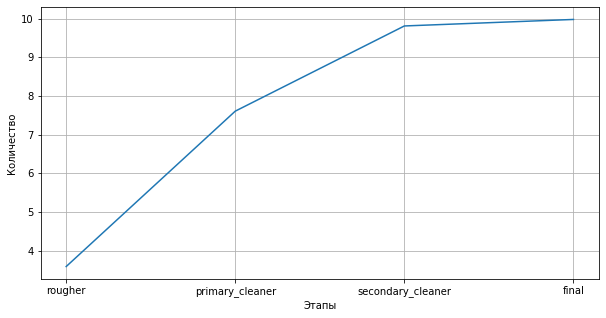

Концентрация в исходном сырье: 3.585095711585748
Концентрация после флотации: 7.606272313195004
Концентрация после первичной обработки: 9.810316539310149
Концентрация после вторичной обработки: 9.978821384192907


In [25]:
concentration_metal(data_full['rougher.input.feed_pb'],
                    data_full['rougher.output.concentrate_pb'],
                    data_full['primary_cleaner.output.concentrate_pb'],
                    data_full['final.output.concentrate_pb'])

**Концентрация серебра**

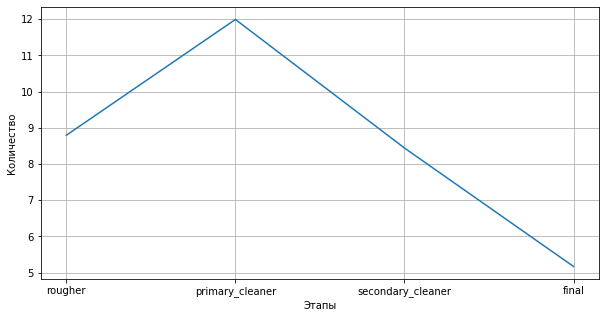

Концентрация в исходном сырье: 8.794927425814688
Концентрация после флотации: 11.994759359873429
Концентрация после первичной обработки: 8.44240807771906
Концентрация после вторичной обработки: 5.168386967510243


In [26]:
concentration_metal(data_full['rougher.input.feed_ag'],
                    data_full['rougher.output.concentrate_ag'],
                    data_full['primary_cleaner.output.concentrate_ag'],
                    data_full['final.output.concentrate_ag'])

**Концентрация золота**

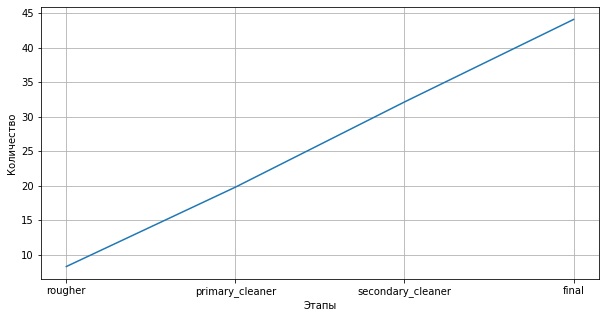

Концентрация в исходном сырье: 8.266097326589103
Концентрация после флотации: 19.772000139486313
Концентрация после первичной обработки: 32.1194004078765
Концентрация после вторичной обработки: 44.0765129419528


In [27]:
concentration_metal(data_full['rougher.input.feed_au'],
                    data_full['rougher.output.concentrate_au'],
                    data_full['primary_cleaner.output.concentrate_au'],
                    data_full['final.output.concentrate_au'])

**Вывод**

Концентрация свинца и золота на каждом этапе увеличивается.  
Концентрация серебра увеличивается только после этапа флотации, на этапах обработки концентрация уменьшается.

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

In [28]:
d_tr = data_train['rougher.input.feed_size'].describe()
d_tt = data_test['rougher.input.feed_size'].describe()
desc_table = pd.concat([d_tr, d_tt], keys=['data_train', 'data_test'], axis=1)
desc_table

,data_train,data_test
count,14149.000000,5290.000000
mean,60.239856,55.952754
std,23.005310,19.080334
min,9.659576,0.046369
25%,48.966751,43.906504
50%,55.269784,50.846843
75%,66.007526,62.451165
max,484.967466,392.494040


<function matplotlib.pyplot.show(*args, **kw)>

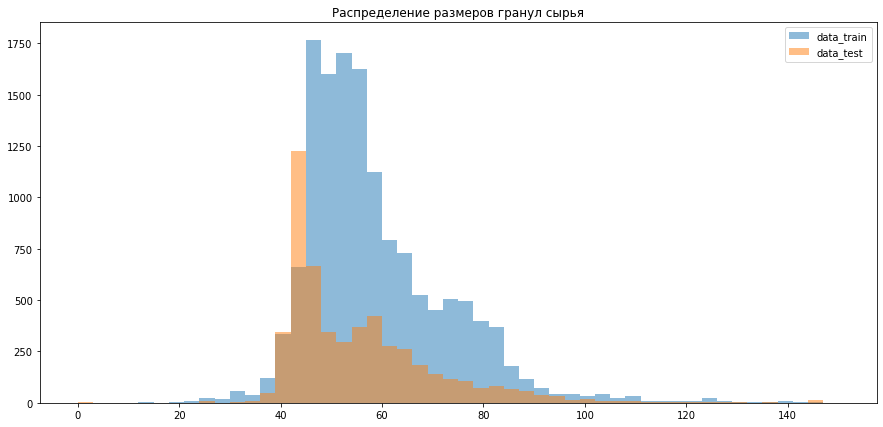

In [29]:
plt.figure(figsize=(15,7))
plt.hist(data_train['rougher.input.feed_size'], bins=50, alpha=.5, range=(0, 150), label='data_train')
plt.hist(data_test['rougher.input.feed_size'], bins=50, alpha=.5, range=(0, 150), label='data_test')
plt.title('Распределение размеров гранул сырья')
plt.legend()
plt.show

**Вывод**

Распределение размеров в тестовой выборке немного ниже, чем в обучающей.  
В целом распределение в выборках одинаковое.

### Суммарная концентрация всех веществ на разных стадиях обработки

In [31]:
def metal_sum(row):
    rougher_input_sum = []
    rougher_output_sum = []
    primary_cleaner_output_sum = []
    final_output_sum = []
    rougher_input_sum = row['rougher.input.feed_ag'] + row['rougher.input.feed_pb'
                        ] + row['rougher.input.feed_sol'] + row['rougher.input.feed_au']
    rougher_output_sum = row['rougher.output.concentrate_ag'] + row['rougher.output.concentrate_pb'
                        ] + row['rougher.output.concentrate_sol'] + row['rougher.output.concentrate_au']
    primary_cleaner_output_sum = row['primary_cleaner.output.concentrate_ag'] + row['primary_cleaner.output.concentrate_pb'
                        ] + row['primary_cleaner.output.concentrate_sol'] + row['primary_cleaner.output.concentrate_au']
    final_output_sum = row['final.output.concentrate_ag'] + row['final.output.concentrate_pb'
                        ] + row['final.output.concentrate_sol'] + row['final.output.concentrate_au']
    
    rougher_input_sum.append(rougher_input_sum)
    rougher_output_sum.append(rougher_output_sum)
    primary_cleaner_output_sum.append(primary_cleaner_output_sum)
    final_output_sum.append(final_output_sum)
    return pd.concat([rougher_input_sum, rougher_output_sum, primary_cleaner_output_sum, final_output_sum
                     ], keys=['rougher_input_sum', 'rougher_output_sum', 'primary_cleaner_output_sum', 'final_output_sum'
                                ], axis=1)

In [32]:
all_metal_sum = metal_sum(data_full)
all_metal_sum.head()

,rougher_input_sum,rougher_output_sum,primary_cleaner_output_sum,final_output_sum
0,51.680034,66.424950,72.640924,63.644396
1,50.659114,67.012710,72.543485,63.957723
2,50.609929,66.103793,72.095042,64.311180
3,51.061546,65.752751,59.957723,63.573449
4,47.859163,65.908382,71.321010,64.004667


<function matplotlib.pyplot.show(*args, **kw)>

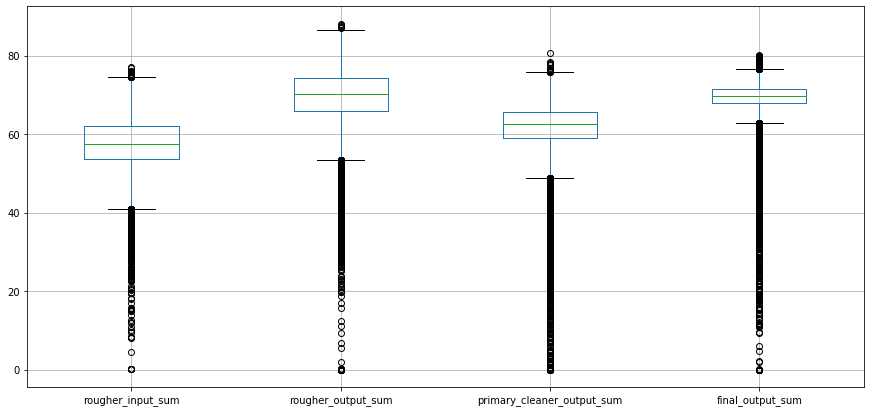

In [33]:
plt.figure(figsize=(15,7))
all_metal_sum.boxplot(column=['rougher_input_sum', 'rougher_output_sum', 'primary_cleaner_output_sum', 'final_output_sum'])
plt.show

In [34]:
all_metal_sum.describe()

,rougher_input_sum,rougher_output_sum,primary_cleaner_output_sum,final_output_sum
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,57.320789,68.170865,60.764731,68.653624
std,7.212680,12.491279,10.017271,7.427536
min,0.040000,0.000000,0.000000,0.000000
25%,53.557679,66.012495,58.929364,67.932362
50%,57.594391,70.181495,62.497674,69.598444
75%,61.953459,74.356904,65.667336,71.368472
max,76.978947,88.140119,80.749343,80.210644


<function matplotlib.pyplot.show(*args, **kw)>

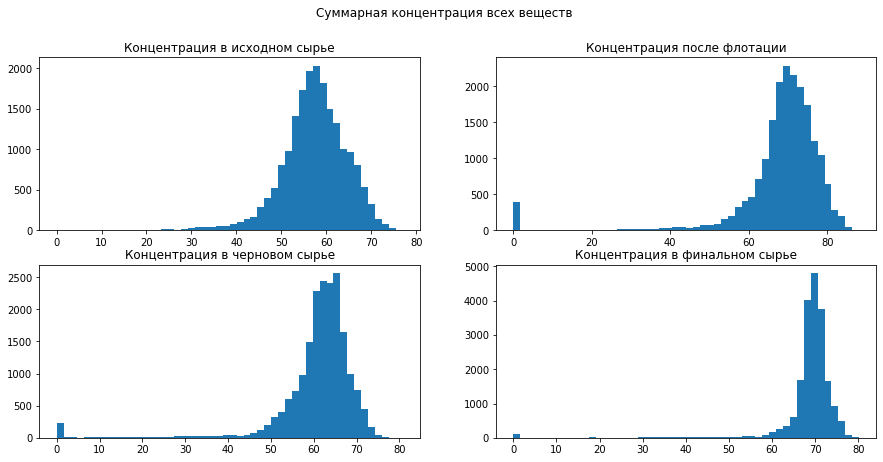

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(15,7))
fig.suptitle('Суммарная концентрация всех веществ')
axs[0, 0].hist(all_metal_sum['rougher_input_sum'], bins=50, label='rougher_input_sum')
axs[0, 0].set_title('Концентрация в исходном сырье')
axs[0, 1].hist(all_metal_sum['rougher_output_sum'], bins=50, label='rougher_output_sum')
axs[0, 1].set_title('Концентрация после флотации')
axs[1, 0].hist(all_metal_sum['primary_cleaner_output_sum'], bins=50, label='primary_cleaner_output_sum')
axs[1, 0].set_title('Концентрация в черновом сырье')
axs[1, 1].hist(all_metal_sum['final_output_sum'], bins=50, label='final_output_sum')
axs[1, 1].set_title('Концентрация в финальном сырье')
plt.show

In [36]:
data_full = pd.concat([data_full, all_metal_sum], axis=1)
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher_input_sum,rougher_output_sum,primary_cleaner_output_sum,final_output_sum
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,51.680034,66.424950,72.640924,63.644396
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,50.659114,67.012710,72.543485,63.957723
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,50.609929,66.103793,72.095042,64.311180
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,51.061546,65.752751,59.957723,63.573449
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,47.859163,65.908382,71.321010,64.004667


In [37]:
index_clean = data_full[(data_full['rougher_input_sum'] > 0) &
                        (data_full['rougher_output_sum'] > 0) &
                        (data_full['primary_cleaner_output_sum'] > 0) &
                        (data_full['final_output_sum'] > 0)].index

print('Итоговое полной наблюдений обучащющей выборки', index_clean.shape[0])

Итоговое полной наблюдений обучащющей выборки 18848


In [38]:
data_train = data_train.query('index in @index_clean')
print('Итоговое количество наблюдений обучащющей выборки', data_train.shape[0])

Итоговое количество наблюдений обучащющей выборки 13727


In [39]:
data_test = data_test.query('index in @index_clean')
print('Итоговое количество наблюдений тестовой выборки', data_test.shape[0])

Итоговое количество наблюдений тестовой выборки 5157


**Вывод**

Присутствуют выбросы суммарного количества металлов в нуле на этапах обработки. Основное распределение находится от 40 до 80. Возможно есть неисправные датчики.  
Строки, в которых присутствуют суммарные нулевые значения удалены.

## Модель

### Функция вычисления sMAPE

In [40]:
def smape(y_true, y_pred):
    metric = 1/len(y_true) * np.sum(np.abs(y_true - y_pred) / ((np.abs(y_true) + np.abs(y_pred)) / 2)) * 100
    return metric

In [41]:
smape_scorer = make_scorer(smape, greater_is_better=False)

In [42]:
def final_smape(rougher, final):
    final_metric = (0.25 * rougher) + (0.75 * final)
    print(final_metric)
    return final_metric

**Вывод**

Созданы функция sMAPE и итоговое sMAPE.

### Подбор модели

In [43]:
def split_data(data, target):
    y = target
    X = data.drop(['final.output.recovery', 'rougher.output.recovery', 'date'], axis=1)    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=12345)
    return X_train, X_valid, y_train, y_valid

In [44]:
X_train_final, X_valid_final, y_train_final, y_valid_final = split_data(
    data_train, data_train['final.output.recovery'])

In [45]:
X_train_rougher, X_valid_rougher, y_train_rougher, y_valid_rougher = split_data(
    data_train, data_train['rougher.output.recovery'])

In [46]:
model_LR = LinearRegression()
model_RF = RandomForestRegressor()

**LinearRegression**

In [47]:
parametrs_LR = { 'fit_intercept':[True,False],
                 'normalize':[True,False],
                 'copy_X':[True, False] }

In [48]:
grid_LR_final = GridSearchCV(model_LR, parametrs_LR, cv=5, scoring=smape_scorer)
grid_LR_rougher = GridSearchCV(model_LR, parametrs_LR, cv=5, scoring=smape_scorer)

In [49]:
grid_LR_final.fit(X_train_final, y_train_final)
grid_LR_final.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [50]:
grid_LR_rougher.fit(X_train_final, y_train_final)
grid_LR_rougher.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [51]:
grid_LR_final.fit(X_train_final, y_train_final)
predicted_valid = grid_LR_final.predict(X_valid_final)
smape_final_LR = smape(y_valid_final, predicted_valid)
print('sMAPE final.output.recovery:')
print(smape_final_LR)

sMAPE final.output.recovery:
8.816106130404572


In [52]:
grid_LR_rougher.fit(X_train_rougher, y_train_rougher)
predicted_valid = grid_LR_rougher.predict(X_valid_rougher)
smape_rougher_LR = smape(y_valid_rougher, predicted_valid)
print('sMAPE final.rougher.recovery:')
print(smape_rougher_LR)

sMAPE final.rougher.recovery:
9.781375352202792


In [53]:
print('Final sMAPE LinearRegression:')
final_smape_LR = final_smape(smape_final_LR, smape_rougher_LR)

Final sMAPE LinearRegression:
9.540058046753236


**RandomForestRegressor**

In [54]:
parametrs_RF = { 'n_estimators': range(10, 21, 2),
                 'max_depth': range(1,11, 2) }

In [55]:
grid_RF_final = GridSearchCV(model_RF, parametrs_RF, cv=5, scoring=smape_scorer)
grid_RF_rougher = GridSearchCV(model_RF, parametrs_RF, cv=5, scoring=smape_scorer)

In [56]:
grid_RF_final.fit(X_train_final, y_train_final)
grid_RF_final.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=18,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [57]:
grid_RF_rougher.fit(X_train_final, y_train_final)
grid_RF_rougher.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [58]:
grid_RF_final.fit(X_train_final, y_train_final)
predicted_valid = grid_RF_final.predict(X_valid_final)
smape_final_RF = smape(y_valid_final, predicted_valid)
print('sMAPE final.output.recovery:')
print(smape_final_RF)

sMAPE final.output.recovery:
7.459185056187188


In [59]:
grid_RF_rougher.fit(X_train_rougher, y_train_rougher)
predicted_valid = grid_RF_rougher.predict(X_valid_rougher)
smape_rougher_RF = smape(y_valid_rougher, predicted_valid)
print('sMAPE final.rougher.recovery:')
print(smape_rougher_RF)

sMAPE final.rougher.recovery:
7.693317938388796


In [60]:
print('Final sMAPE RandomForestRegressor:')
final_smape_RF = final_smape(smape_final_RF, smape_rougher_RF)

Final sMAPE RandomForestRegressor:
7.634784717838395


**Вывод**



### Тестирование лучшей модели

In [61]:
y_test_final = data_test['final.output.recovery']
y_test_rougher = data_test['rougher.output.recovery']
X_test = data_test.drop(['final.output.recovery', 'rougher.output.recovery', 'date'], axis=1)    

**RandomForestRegressor**

In [62]:
predicted_test = grid_RF_final.predict(X_test)
smape_final_RF_test = smape(y_test_final, predicted_test)
print('sMAPE final.output.recovery test:')
print(smape_final_RF_test)

sMAPE final.output.recovery test:
9.947361393527162


In [63]:
predicted_test = grid_RF_rougher.predict(X_test)
smape_rougher_RF_test = smape(y_test_rougher, predicted_test)
print('sMAPE rougher.output.recovery test:')
print(smape_rougher_RF_test)

sMAPE rougher.output.recovery test:
10.591831901164644


In [64]:
print('Final sMAPE test:')
final_smape_RF_test = final_smape(smape_final_RF_test, smape_rougher_RF_test)

Final sMAPE test:
10.430714274255273


**Baseline model**

In [65]:
dummy_regr_final = DummyRegressor(strategy="mean")
dummy_regr_rougher = DummyRegressor(strategy="mean")

In [66]:
dummy_regr_final.fit(X_train_final, y_train_final)
dummy_regr_rougher.fit(X_train_rougher, y_train_rougher)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [67]:
predicted_dummy = dummy_regr_final.predict(X_test)
smape_final_dummy = smape(y_test_final, predicted_dummy)
print('sMAPE final.output.recovery:')
print(smape_final_dummy)

sMAPE final.output.recovery:
10.22357336913371


In [68]:
predicted_dummy = dummy_regr_rougher.predict(X_test)
smape_rougher_dummy = smape(y_test_rougher, predicted_dummy)
print('sMAPE rougher.output.recovery:')
print(smape_rougher_dummy)

sMAPE rougher.output.recovery:
10.281913164290588


In [69]:
print('Final sMAPE dummy:')
final_smape_RF = final_smape(smape_final_dummy, smape_rougher_dummy)

Final sMAPE dummy:
10.267328215501369


## Общий вывод

Лучшая модель **RandomForestRegressor**:

In [70]:
overall = pd.DataFrame({
    'target': ['final target', 'rougher target', 'final sMAPE'], 
    'train data': [smape_final_RF, smape_rougher_RF, final_smape_RF], 
    'test data': [smape_final_RF_test, smape_rougher_RF_test, final_smape_RF_test],
})
overall

,target,train data,test data
0,final target,7.459185,9.947361
1,rougher target,7.693318,10.591832
2,final sMAPE,10.267328,10.430714


Возможно присутствуют неисправные датчики, так как замечены невозможные нулевые значения концентрации всех веществ на этапах обработки.